In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df = df.drop(["sl_no", "salary"], axis=1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [3]:
df = df.replace({'gender': {'M': 1, 'F': 0}})
df = df.replace({'ssc_b': {'Central': 1, 'Others': 0}})
df = df.replace({'hsc_b': {'Central': 1, 'Others': 0}})
df = df.replace({'workex': {'Yes': 1, 'No': 0}})
df = df.replace({'status': {'Placed': 1, 'Not Placed': 0}})
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1
1,1,79.33,1,78.33,0,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1
2,1,65.00,1,68.00,1,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1
3,1,56.00,1,52.00,1,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0
4,1,85.80,1,73.60,1,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1


In [4]:
df = pd.get_dummies(df, columns=['hsc_s', 'degree_t', 'specialisation'])
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,mba_p,status,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,67.00,0,91.00,0,58.00,0,55.0,58.80,1,0,1,0,0,0,1,0,1
1,1,79.33,1,78.33,0,77.48,1,86.5,66.28,1,0,0,1,0,0,1,1,0
2,1,65.00,1,68.00,1,64.00,0,75.0,57.80,1,1,0,0,1,0,0,1,0
3,1,56.00,1,52.00,1,52.00,0,66.0,59.43,0,0,0,1,0,0,1,0,1
4,1,85.80,1,73.60,1,73.30,0,96.8,55.50,1,0,1,0,1,0,0,1,0


In [5]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('status', axis=1), df['status'], test_size=0.2, random_state=42)

In [6]:
print(train_x.shape, test_x.shape)

(172, 17) (43, 17)


In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [8]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.813953488372093

In [9]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [10]:
roc_auc_score(test_y, probabilities[:, 1])

0.8776881720430108

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[ 6,  6],
       [ 2, 29]])

In [12]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

1.0

In [13]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

1.0

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0, 0.5, 'True Positive Rate')

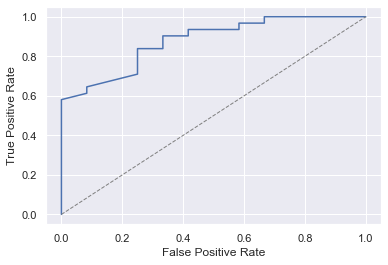

In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [16]:
def predict_placement(gender, ssc_p, ssc_b, hsc_p, hsc_b, hsc_s, degree_p, degree_t, workex, etest_p, specialisation, mba_p):
    input = [{
        'gender': 1 if gender == 'M' else 0,
        'ssc_p': ssc_p, 
        'ssc_b': 1 if ssc_b == 'Central' else 0, 
        'hsc_p': hsc_p, 
        'hsc_b': 1 if hsc_b == 'Central' else 0, 
        'degree_p': degree_p,
        'workex': 1 if workex == 'Yes' else 0,
        'etest_p': etest_p,
        'mba_p': mba_p,
        'hsc_s_Arts': 1 if hsc_s == 'Arts' else 0,
        'hsc_s_Commerce': 1 if hsc_s == 'Commerce' else 0,
        'hsc_s_Science': 1 if hsc_s == 'Science' else 0,
        'degree_t_Comm&Mgmt': 1 if degree_t == 'Comm&Mgmt' else 0,
        'degree_t_Others': 1 if degree_t == 'Others' else 0,
        'degree_t_Sci&Tech': 1 if degree_t == 'Sci&Tech' else 0,
        'specialisation_Mkt&Fin': 1 if specialisation == 'Mkt&Fin' else 0,
        'specialisation_Mkt&HR': 1 if specialisation == 'Mkt&HR' else 0
    }]
    return model.predict_proba(pd.DataFrame(input))[0][0]

In [22]:
predict_placement('F', 70, 'Others', 90, 'Others', 'Science', 80, 'Sci&Tech', 0, 70, 'Mkt&Fin', 70)

0.11

In [23]:
predict_placement('F', 70, 'Others', 80, 'Others', 'Science', 90, 'Sci&Tech', 1, 80, 'Mkt&Fin', 80)

0.23

In [24]:
predict_placement('M', 70, 'Central', 80, 'Central', 'Science', 90, 'Sci&Tech', 1, 80, 'Mkt&Fin', 80)

0.22

In [25]:
predict_placement('M', 70, 'Central', 80, 'Central', 'Commerce', 90, 'Comm&Mgmt', 1, 80, 'Mkt&Fin', 80)

0.23

In [26]:
predict_placement('M', 70, 'Central', 80, 'Central', 'Commerce', 90, 'Comm&Mgmt', 0, 80, 'Mkt&Fin', 80)

0.23